In [108]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
df = pd.read_excel('/Users/xrovr/Downloads/data.xls')
df.info()
#sepal_length/width, petal_length/width вже позначені як числові дані float, species як об'єкт

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  2415 non-null   float64
 1   sepal_width   2415 non-null   float64
 2   petal_length  2415 non-null   float64
 3   petal_width   2415 non-null   float64
 4   species       2424 non-null   object 
dtypes: float64(4), object(1)
memory usage: 94.8+ KB


In [109]:
df.describe()
#sepal_length не може мати негативне значення, значення < 0 будуть хибними

,sepal_length,sepal_width,petal_length,petal_width
count,2415.000000,2415.000000,2415.000000,2415.000000
mean,6.470257,3.963540,4.616911,2.189752
std,2.140522,1.022686,1.987028,1.046936
min,-10.000000,0.000000,0.000000,0.000000
25%,5.950000,3.450000,2.780000,1.460000
50%,6.700000,4.000000,5.090000,2.240000
75%,7.490000,4.580000,6.150000,2.940000
max,10.490000,7.470000,9.040000,5.440000


In [110]:
df['sepal_length'] = numpy.where(df['sepal_length'] < 0, df['sepal_length'].mean(), df['sepal_length'])
df.describe()
#або так df.loc[df['sepal_length'] < 0, 'sepal_length'] = df['sepal_length'].mean()

,sepal_length,sepal_width,petal_length,petal_width
count,2415.000000,2415.000000,2415.000000,2415.000000
mean,6.614980,3.963540,4.616911,2.189752
std,1.502872,1.022686,1.987028,1.046936
min,0.000000,0.000000,0.000000,0.000000
25%,5.980000,3.450000,2.780000,1.460000
50%,6.700000,4.000000,5.090000,2.240000
75%,7.490000,4.580000,6.150000,2.940000
max,10.490000,7.470000,9.040000,5.440000


In [111]:
df[df['sepal_width'] == 0]
#у describe() non-null в колонці species більше ніж у інших колонках

,sepal_length,sepal_width,petal_length,petal_width,species
15,0.0,0.0,0.0,0.0,Iris-setosa
53,0.0,0.0,0.0,0.0,Iris-versicolor
270,0.0,0.0,0.0,0.0,Iris-virginica
275,0.0,0.0,0.0,0.0,Iris-versicolor
277,0.0,0.0,0.0,0.0,Iris-setosa
...,...,...,...,...,...
2391,0.0,0.0,0.0,0.0,Iris-virginica
2396,0.0,0.0,0.0,0.0,Iris-versicolor
2398,0.0,0.0,0.0,0.0,Iris-setosa
2414,0.0,0.0,0.0,0.0,Iris-setosa


In [112]:
df.isnull().any().any()
#є багато значень 0 та NaN, які можна замінити. Спочатку переведемо NaN  в 0

True

In [113]:
df.fillna(0, inplace = True)

In [114]:
df[df.isnull().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species


In [115]:
#заміна 0 значень mean
df['sepal_length'][0:1001].replace(0, df['sepal_length'].mean(), inplace = True)
df['sepal_width'][0:1001].replace(0, df['sepal_width'].mean(), inplace = True)
df['petal_length'][0:1001].replace(0, df['petal_length'].mean(), inplace = True)
df['petal_width'][0:1001].replace(0, df['petal_width'].mean(), inplace = True)

#заміна ffill, bfill
df[1001:2001].replace(0, method = 'ffill', inplace=True)
df[2001:].replace(0, method = 'bfill', inplace=True)

In [116]:
df[df['sepal_width'] == 0]
#після заміни нульових значень, одна зі строк залишається 0

,sepal_length,sepal_width,petal_length,petal_width,species
2423,0.0,0.0,0.0,0.0,Iris-virginica


In [117]:
df.iloc[2423, 1].dtype
#хоча вона як і інші значення float. Тому я її викину

dtype('float64')

In [118]:
df.drop(labels=[2423], axis=0, inplace = True)
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
2418,7.03,3.41,5.63,3.06,Iris-versicolor
2419,6.11,5.08,3.15,2.22,Iris-setosa
2420,7.17,6.07,4.30,1.78,Iris-setosa
2421,6.48,4.98,4.12,3.03,Iris-setosa
2422,6.73,4.71,3.67,2.90,Iris-setosa


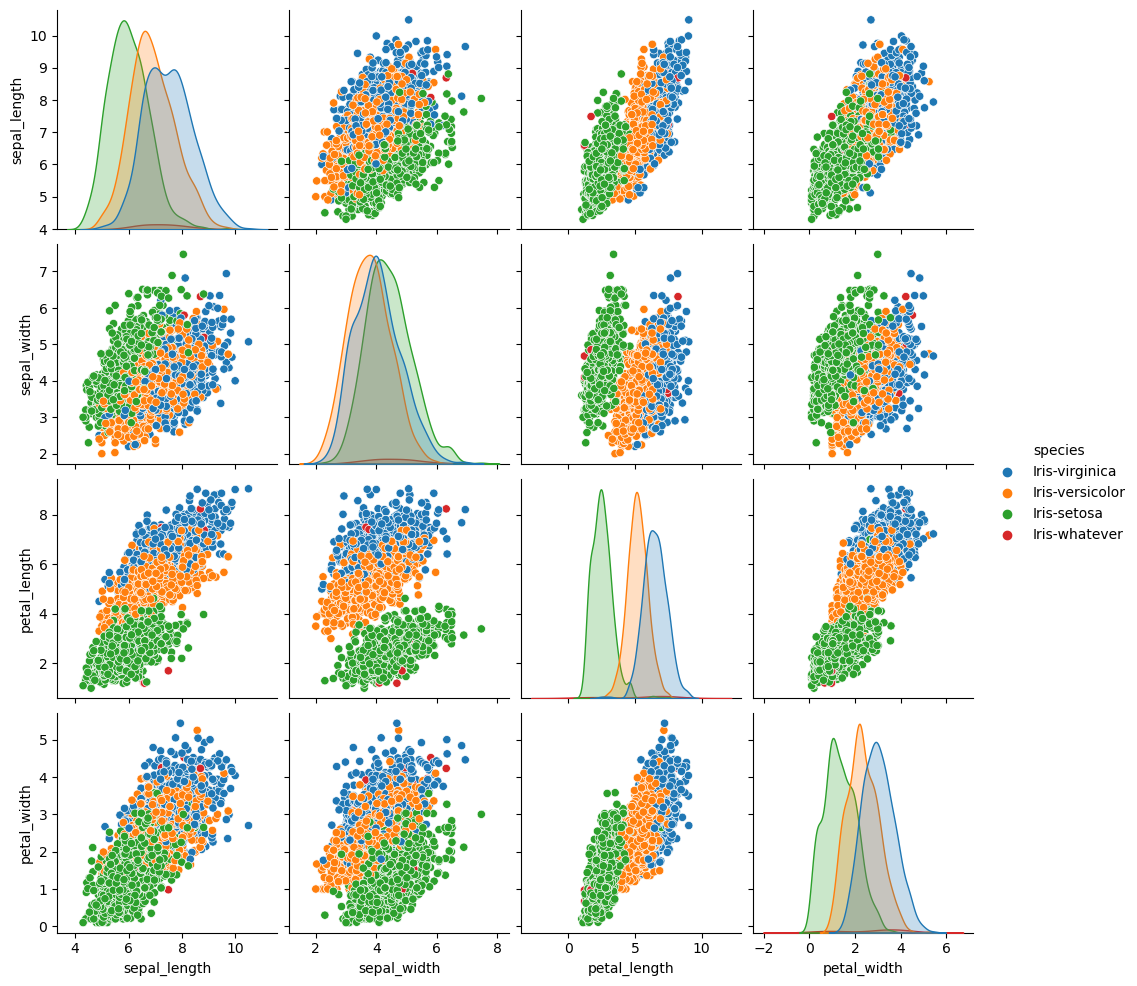

In [119]:
import seaborn as sns

sns.pairplot(df, hue = 'species')
#ще знайдено в легенді 'species' 'iris-whatever'

In [120]:
#у species є підвид iris-whatever, який можливо був хибно класифікований. 
df_whatever = df[df['species'] == 'Iris-whatever']
#щоб не скомпрометувати інші дані, виведу його в окрему df_whatever, і видалю з першої df
df = df[df['species'].str.contains("Iris-whatever") == False]

In [121]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,2399.000000,2399.000000,2399.000000,2399.000000
mean,6.793230,4.069922,4.728563,2.241460
std,1.032978,0.785272,1.838133,0.979536
min,4.300000,2.000000,1.000000,0.100000
25%,6.060000,3.520000,2.965000,1.520000
50%,6.700000,4.020000,5.100000,2.240000
75%,7.510000,4.580000,6.150000,2.940000
max,10.490000,7.470000,9.040000,5.440000


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2399 entries, 0 to 2422
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  2399 non-null   float64
 1   sepal_width   2399 non-null   float64
 2   petal_length  2399 non-null   float64
 3   petal_width   2399 non-null   float64
 4   species       2399 non-null   object 
dtypes: float64(4), object(1)
memory usage: 112.5+ KB


В даних були скореговані наступні моменти:
- видалені значення < 0, тому що довжина/ширина не може бути менше 0
- замінені значення 0 та NaN, тепер non-null співпадають з колонкою species
- видалений останній рядок, який мав 0 значення
- Iris-whatever виведено в окрему df. Їх теоретично можна було б підігнати під інші види iris у таблиці (за найближчим значенням), але можливо це окремий вид iris. Тому я б перевірила з джерелом данних, звідки береться цей iris-whatever. 

На данному етапі здається, що дані більш менш підчищені. На графіках відслідковується закономірність і, наприклад, різні види setosa відрізняються за petal_length

In [123]:
X = df[['sepal_length', 'sepal_width', 'petal_length']]
Y = df[['petal_width']]

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 100)

In [125]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [126]:
linear_regression.fit(X_train, Y_train)

LinearRegression()

In [127]:
linear_regression.predict(X_test)
pred = linear_regression.predict(X_test)

In [128]:
pred

array([[2.9410624 ],
       [3.2580652 ],
       [1.57316038],
       [1.77200277],
       [2.48035594],
       [1.17899062],
       [1.85134109],
       [2.45031639],
       [1.00021974],
       [2.21215858],
       [3.30137756],
       [0.99948383],
       [2.2681835 ],
       [1.29641097],
       [2.14584257],
       [1.21436501],
       [2.9252604 ],
       [1.53345601],
       [1.8985163 ],
       [3.62200237],
       [2.38588303],
       [1.08583866],
       [0.62851087],
       [1.41637138],
       [2.56430536],
       [1.90251481],
       [2.14171246],
       [0.73384541],
       [3.42634652],
       [1.76143373],
       [2.32967858],
       [2.14171246],
       [3.25992107],
       [3.653434  ],
       [0.75855881],
       [2.13872563],
       [3.17454553],
       [1.10472408],
       [1.94356059],
       [1.44592948],
       [3.35441643],
       [2.58279467],
       [2.37024037],
       [1.46968065],
       [2.97100585],
       [2.96521064],
       [2.25163438],
       [2.275

In [129]:
# Explained variance score: 1 is perfect prediction
print('Variance score: ', linear_regression.score(X, Y))

Variance score:  0.7234138565748046


Згодували 'sepal_length', 'sepal_width', 'petal_length' (без розділення на вид iris) до лінійної моделі, і отримали variance 0.72. Якщо variance 1 значив би perfect fit, то успішність передбачень цієї моделі 72%. 
Тепер розділимо по підвидам

In [130]:
#setosa
X1 = df[df['species']=='Iris-setosa'].drop(labels = ['petal_width', 'species'], axis=1)
Y1 = df[df['species']=='Iris-setosa']['petal_width']

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.30, random_state = 100)
linear_regression1 = LinearRegression()
linear_regression1.fit(X1_train, Y1_train)
linear_regression1.predict(X1_test)
pred1 = linear_regression1.predict(X1_test)
print('Variance score: ', linear_regression1.score(X1, Y1))

Variance score:  0.5015914392511254


In [131]:
#versicolor
X2 = df[df['species']=='Iris-versicolor'].drop(labels = ['petal_width', 'species'], axis=1)
Y2 = df[df['species']=='Iris-versicolor']['petal_width']

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.30, random_state = 100)
linear_regression2 = LinearRegression()
linear_regression2.fit(X2_train, Y2_train)
linear_regression2.predict(X2_test)
pred1 = linear_regression1.predict(X2_test)
print('Variance score: ', linear_regression1.score(X2, Y2))

Variance score:  0.5133986338541905


In [132]:
#virginica
X3 = df[df['species']=='Iris-virginica'].drop(labels = ['petal_width', 'species'], axis=1)
Y3 = df[df['species']=='Iris-virginica']['petal_width']

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.30, random_state = 100)
linear_regression3 = LinearRegression()
linear_regression3.fit(X3_train, Y3_train)
linear_regression3.predict(X3_test)
pred1 = linear_regression1.predict(X3_test)
print('Variance score: ', linear_regression1.score(X3, Y3))

Variance score:  0.3091412717827663


In [139]:
df[df['species'] == 'Iris-virginica'].count()

sepal_length    799
sepal_width     799
petal_length    799
petal_width     799
species         799
dtype: int64

In [140]:
df[df['species'] == 'Iris-setosa'].count()

sepal_length    800
sepal_width     800
petal_length    800
petal_width     800
species         800
dtype: int64

In [141]:
df[df['species'] == 'Iris-versicolor'].count()

sepal_length    800
sepal_width     800
petal_length    800
petal_width     800
species         800
dtype: int64

Кожного виду iris в таблиці однакова кількість (799 для Iris - virginica), але точність передбачення petal_width різна. Найбільш точне передбачення було отримано коли до моделі було згодовано весь датасет без розділення на підвиди iris). Коли згодовували лише індивідуальні види iris, точність передбачення впала. За умови, що дослідження було зроблено правильно (сумнівно), можна зробити висновок, що, по перше, як вже сказали, більше даних дали кращий результат, але також, по друге, що у iris-versicolor є більша залежність petal_width від інших показників (50.1%), а у iris-virginica найменша (30.9%) на основі проаналізованих даних. 